In [2]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

In [3]:
# 치료 전, 후 데이터 생성
pre_treatment = np.random.randint(1,10, size = 20)
post_treatment = pre_treatment + np.random.randint(-3,4,size=20)

In [4]:
# 데이터프레임으로 저장
data = pd.DataFrame({
    'pre_treatment': pre_treatment,
    'post_treatment': post_treatment})
print(data)
data.to_csv('./data/treatment_data.csv', index=False)

    pre_treatment  post_treatment
0               2               2
1               6               5
2               1               2
3               9               6
4               9               7
5               6               8
6               1               3
7               5               4
8               9              12
9               5               5
10              6               6
11              2               5
12              5               6
13              7               4
14              1               4
15              4               1
16              6               8
17              1               1
18              1              -2
19              3               1


##환자의 치료 전과 후를 비교하여 효과성을 평가하는 코드 실습

In [5]:
# data 불러오기
data = pd.read_csv('./data/treatment_data.csv')

# 윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(data['pre_treatment'],data['post_treatment'])

# 결과출력
print('Statistic: ',stat)
print('p-value:', p)

if p > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistic:  65.0
p-value: 0.8749256961283967
Same distribution (fail to reject H0)


C:\Users\noeyx\anaconda3\envs\AI\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


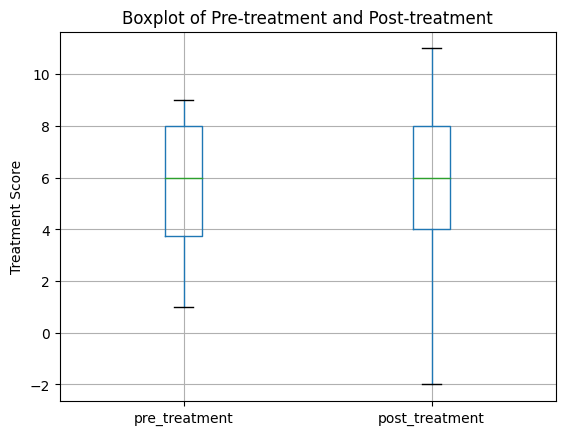

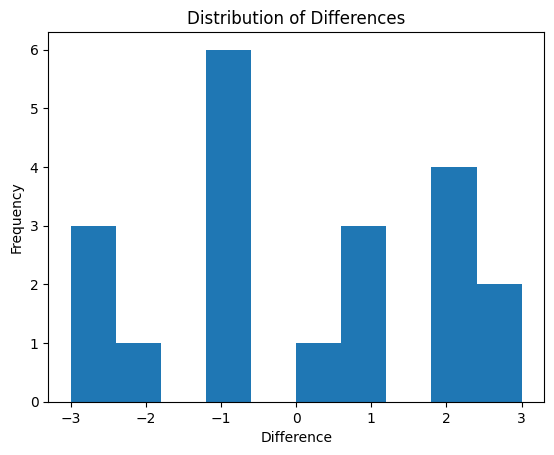

In [14]:
import matplotlib.pyplot as plt

# boxplot 그리기
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()
 
# 두 변수의 차이에 대한 분포를 시각화
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()